# Module 3.1 Numerical Integration (1 of 2)

Throughout physics we encounter the need to evaluate integrals. 
For example, work is the line integral of a force along a path, Gauss' law relates the surface
integral of the electric field to the enclosed charge, the action is the integral of the Lagrangian,
_etc_. 

## Learning objectives:
* Be able to numerically compute an integral using left/right/midpoint methods.
* Make an assessment of the accuracy of the integral and plot the error as a function of the number of intervals

# Pre-class

Remind yourself of Reimann sums, either through your calculus textbook and/or this [video](https://youtu.be/rfG8ce4nNh0)

Download the PDF of [TAK](https://catalog.lib.ncsu.edu/record/NCSU4441969) and read Sec 3.3, up to at least page 53. You will probably find it helpful to read along using a paper/pencil, and/or be able to draw on your PDF.


# In-class


## Preliminary: computing sums

As part of this section, we'll need to know how to compute some sums.  Recall that there are a few ways of doing that.  Recall that we computed the sum of an array of numbers `xarray` using:

    # ################################################
    # For loop type 1
    
    # Prepare a variable to store the sum
    mysum=0
    
    # Loop over indices
    for i in range(len(xarray)):
        mysum = mysum + xarray[i]
        
    # ################################################
    # For loop type 2 
    # Prepare a variable to store the sum
    mysum=0
    
    # Loop over values
    for x in xarray:
        mysum = mysum + x
    
    # ################################################
    # No loops -- use the built-in `sum` function
    mysum = np.sum( xarray )
    
If you're ever confused about what a numpy function does, Google is your friend:
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.sum.html. Although the documentation may be somewhat overwhelming at times, there is usually a simple example or two at the bottom of the page.

**Exercise**: Compute the sum of the numbers ``1.0`` through ``10.0`` (inclusive) separated by ``1`` using all three the methods above.  You'll need to generate the `xarray`.  Print it before you sum, just to make sure you have it right.

In [4]:
# Method 1
xarray = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(xarray)

# Now copy the for loop from above
my_sum = 0
for i in range(len(xarray)):
    my_sum = my_sum + xarray[i]

print(my_sum)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
55


In [5]:
# Method 2
my_sum = 0
for x in xarray:
    my_sum = my_sum + x

print(my_sum)

55


In [6]:
# Method 3
import numpy as np # Probably should be at beginning, but I will put it here for method 3 clarity
my_sum = np.sum(xarray)
print(my_sum)


55


## Rectangle Methods


The integral of a function is the "area under the curve". (This is the case for most functions we encounter in 
physics. Some exotic functions require a more sophisticated definition of the integral.) The area under the 
curve $f(x)$ from $x=a$ to $x=b$ can be approximated as the sum of the areas of the rectangles shown in the figure:

![Integration rectangles](https://upload.wikimedia.org/wikipedia/commons/e/ea/Integration_rectangle.png)

The rectangles are formed by dividing the interval $[a,b]$ into $N$ subintervals, from $[x_0,x_1]$, to 
$[x_{N-1},x_N]$. (Note that $x_0 = a$ and $x_N = b$.) The height of each rectangle is the value of the function 
at some point $\bar x_i$ within the subinterval
$[x_{i-1},x_i]$. The area of the $i$th rectangle is the product of the height $f(t_i)$ and the width $x_{i} - x_{i-1}$. 
Then the integral 

$$
I = \int_a^b f(x)\, dx
$$

is approximated by the sum of the areas of the rectangles:

$$
I \approx \sum_{i=0}^{N-1} f(\bar x_i)\,(x_i - x_{i-1})
$$

This approximation is called the Riemann sum. The exact value for $I$ is obtained by taking the limit $N\to \infty$.

In practice we must choose where to place the $x_i$'s and  $\bar x_i$'s before using the Riemann sum to 
approximate the integral $I$. Different choices lead to different numerical integration methods.
The simplest choice for the $x_i$'s is to make them equally spaced between the endpoints. That is, 
let $h = (b-a)/N$ denote the width of each subinterval, with

$$
x_i = a + ih
$$

for $i = 0,\ldots N-1$. There are three obvious choices for the $\bar x_i$'s:

1) With $\bar x_i = x_{i} = a + ih $, the height of each rectangle 
is the value of the function at the left side of the subinterval. This yields the _left endpoint rule_ approximation to $I$:

$$
I_L =  \sum_{i=0}^{N-1} f(a + ih) \, h
$$

2) With $\bar x_i = x_{i+1} = a + (i+1)h$, the height of each rectangle is the value of the function at the right side of the subinterval. This 
is the _right endpoint rule_

$$
I_R =  \sum_{i=0}^{N-1} f(a + (i+1)h) \, h
$$

3) With $\bar x_i = (x_i + x_{i+1})/2 = a + ih +h/2$, the height of each rectangle is the value of the 
function at the midpoint of the subinterval. This yields 

$$
I_M =  \sum_{i=0}^{N-1} f(a + (i+1/2)h) \, h
$$

which is called the "midpoint rule". 

Exercise
----------
Write a code some integrate the function $f(x) = \sin x$ between $a=0$ and $b=\pi/2$ using both 
the left and right endpoint rules. Structure your code so that it's easy to change $f(x)$, $a$, $b$, and the 
number of subintervals $N$. I suggest that you make a function of the form:

    def leftpoint(f, a, b, N):

where you may pass in the function `f` (defined elsewhere), and the variables `a`, `b` and `N`.

Compare your results of left/right endpoint to each other, and to the correct value.
Your results should become more accurate as you increase the number of subintervals $N$. 

In [7]:
import numpy as np

# Hint: for development/debugging,
# you may want to pick a set of $x_i$ that you know.  Print them to the screen to ensure
# you know that x-axis is correct. For example, a=1, b=2, N = 10.

def leftpoint(f,a,b,N):
    h = (b - a) / N
    
    my_sum = 0

    # Compute the sum somehow.  Maybe one of the loops above?
    for i in range(N):
        my_sum = my_sum + f(a + i*h) * h
    

    return my_sum   # Note that we need this to tell the code outside of the function about the result
    

def rightpoint(f,a,b,N):
    h = (b - a) / N
    
    my_sum = 0

    # Compute the sum somehow.  Maybe one of the loops above?
    for i in range(N):
        my_sum = my_sum + f(a + (i + 1)*h) * h
    

    return my_sum   # Note that we need this to tell the code outside of the function about the result


N = 1000
result_left = leftpoint(np.sin, 0, np.pi/2, N)
result_right = rightpoint(np.sin, 0, np.pi/2, N)
print("The result of the integral for",N, "subintervals for the left is", result_left, "and right", result_right)
print("Left is under and right is over the true value.")


The result of the integral for 1000 subintervals for the left is 0.9992143962198363 and right 1.0007851925466311
Left is under and right is over the true value.


You may notice that the answer is not exactly close to the real answer.  Let's investigate how poorly we're doing.  We can do this here by computing the integral for a variable number of intervals ($N_1, N_2, N_3, ...$).  Suppose we do this for $m$ intervals.  We'll need some storage space, and to compute the integral for each $N_m$.

Exercise
--------
Compute the integral of $sin(x)$ from $x=0$ to $x=\pi/2$ using the leftpoint rule using $N=2,4,8,16,32,64,128,256,512,1024$.  Make a plot of the answer as a function of $N_m$.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


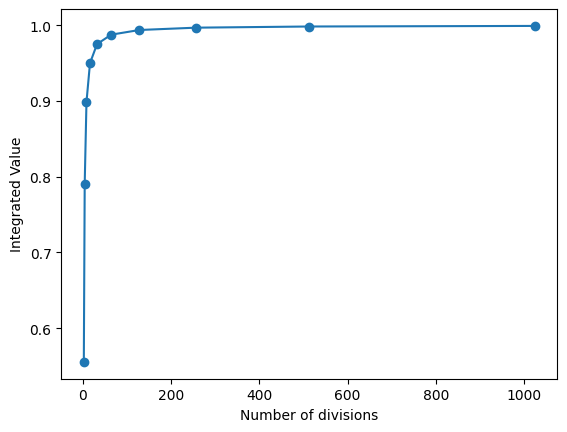

In [8]:
import pylab as py
import numpy as np

Nlist = [2,4,8,16,32,64,128,256,512,1024]
anslist = np.zeros(10) # An array of zeros the same size as Nlist
print(anslist)

# Note the use of `enumerate` here.  We'll want to store the result in a
# different array than the one we're looping over, so `enumerate`
# makes sense.
for iN, N in enumerate(Nlist):
    anslist[iN] = leftpoint(np.sin, 0, np.pi/2, N) # Evaluate the integral using the function you defined

py.plot(Nlist, anslist,'o-')
py.xlabel('Number of divisions')
py.ylabel('Integrated Value')
py.show()

Eventually, for large N, it looks like we approach the right answer.  It's somewhat hard to see exactly how
close we get on these scales,
so let's adjust.  Make a plot of $\log(|$calculated answer - real answer$|)$ vs $\log(N_m)$. $|x|$ indicates the absolute value of $x$, and it's implemented in `numpy` as `numpy.abs()`.

_Question:_ Which base is the logarithm computed in?  How could you change it?  (Google is your friend)

If you use np.log it will be in base 2 and to change it you can add a number to the end, so base 10 is np.log10().

_Note:_ you can probably re-use your array of answers from above!

The slope is -1.0153854615331288 , and the intercept is -0.15768106293715975 .


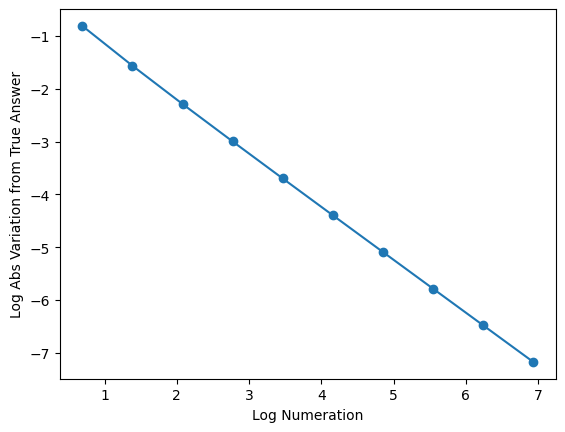

In [9]:
x_log = np.log(Nlist)
y_log = np.log(np.abs(anslist - 1))

slope, intercept = np.polyfit(x_log, y_log, 1)
print("The slope is", slope, ", and the intercept is", intercept, ".")

py.plot(x_log, y_log, 'o-')
py.xlabel('Log Numeration')
py.ylabel('Log Abs Variation from True Answer')
py.show()

If all went well, you got a straight line.  What is the slope? 

The slope trends downward for increasing numerations, so we are approaching 1 for the integration value.

Intuitively, we expect the midpoint rule to give a better approximation to the area under the curve than the left or right 
endpoint rules. 

# Post-class

If you didn't make it to the end (that's fine!), the remaining exercises (above) are to be completed on your own time, so that you are ready to start Module 3.2 which picks up where this one left off. Because these two modules work together, you will benefit most from Module 3.2 if you have draft versions of HW 3.1 and 3.2 (below) done beforehand.

If you feel like you can't make it the rest of the way through on your own, please get HELP! from the instructors or your groupmates or on the Forum.

If you make it to the end of the Module before the end of class: great! You have time to start work on the homework problems for this module. 

## Homework 3.1 (JHub + $\LaTeX{}$)

a) Write a function `midpoint` which integrates a function `f` from $a$ to $b$, using $N$ intervals. This function will take the form:
* Input: f,a,b,N
* Output: the integration

For this problem, JHub nbgrader will auto-check that your `midpoint` function generates the correct output. You will need to have the exact input/output specified in this problem. Please also include a copy of your code in your $\LaTeX{}$ writeup.

b) For the definite integral of $f(x) = \sin x$ from $a$ to $b$  from $a=0$ and $b=\pi/2$, compute the error for $N = 2,4,8,16,32, 64, 128, 256$ and make a log-log plot of the absolute value of the error versus $N$. 

c) The error is proportional to some power of $N$. What is that power? 

We can see the slope is roughly around -2 (exact number in following code), meaning that the error is proportional to the power -2 (y=cx^-2) since the slope directly relates to proportionality for log-log graphs (for this example). 

d) **On the same plot**, show the results from the leftpoint integration  (Make sure to properly label the figure!). Hint: you can just change the name of the function call from `midpoint` to `leftpoint`, and rerun the same code! Include a copy of your `leftpoint` code in your $\LaTeX{}$ writeup.  

e) Which method is better?  And, how much better?

The midpoint is better because the slope of the leftpoint method is -1, meaning it is proportional to y = cx^-1. This also means that while the error decreases linearly for the leftpoint method, the midpoint decreases quadratically. Thus, the midpoint proportionally decreases the error by a factor of x more than the leftpoint method (dependent on x or in this case the number of divisions). Furthermore, they start at different intercepts with the leftpoint being a much different number than the true value of 1. Thus, it takes many more numerations to get to a similar error as the midpoint method's N = 2.

The following arrays depict the apporximations for sin using a different number of numeration for midpoint and leftpoint methods.
Midpoint:
For 2 :  1.026172152977031
For 4 :  1.0064545427995637
For 8 :  1.0016081890839748
For 16 :  1.0004017081549654
For 32 :  1.0001004058641836
For 64 :  1.0000251001429514
For 128 :  1.0000062749530492
For 256 :  1.0000015687330948
Leftpoint:
For 2 :  0.5553603672697958
For 4 :  0.7907662601234133
For 8 :  0.8986104014614886
For 16 :  0.9501092952727317
For 32 :  0.9752555017138486
For 64 :  0.987677953789016
For 128 :  0.9938515269659837
For 256 :  0.9969289009595165
Midpoint: The slope is -2.0026260159612237 , and the intercept is -2.2636813237675844 .
Leftpoint: The slope is -1.0216825301865782 , and the intercept is -0.1424924085691066 .


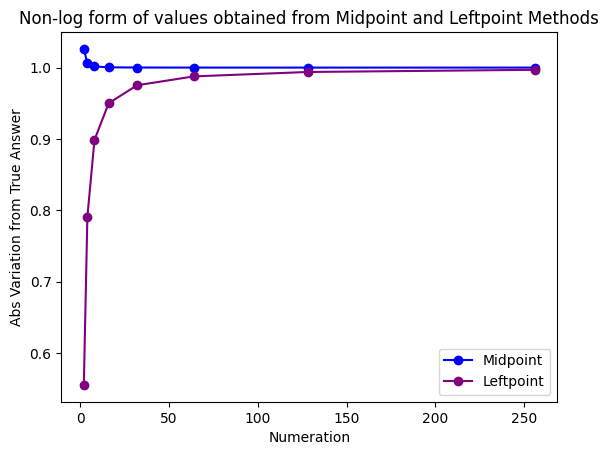

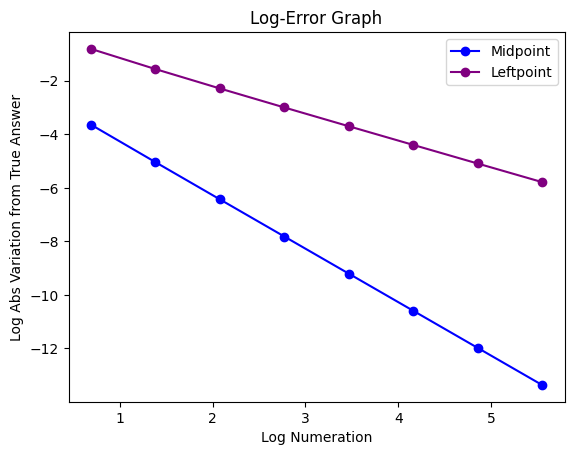

In [ ]:
import pylab as py
import numpy as np

# Midpoint (function, start, end, subintervals): Calculates a height, and then sums over N using the midpoint calculation for riemann sums. 
def midpoint(f,a,b,N):
    h = (b - a) / N
    
    my_sum = 0

    # Compute the sum somehow.  Maybe one of the loops above?
    for i in range(N):
        my_sum = my_sum + f(a + (i + 1/2)*h) * h

    return my_sum   # Note that we need this to tell the code outside of the function about the result


# Leftpoint (function, start, end, subintervals): Calculates a height, and then sums over N using the leftpoint calculation for riemann sums.
def leftpoint(f,a,b,N):
    h = (b - a) / N # Height
    
    my_sum = 0

    # Compute the sum using left point of subinterval. 
    for i in range(N):
        my_sum = my_sum + f(a + i*h) * h
    

    return my_sum   # Note that we need this to tell the code outside of the function about the result


Nlist = [2,4,8,16,32,64,128,256]
anslist_midpoint = np.zeros(len(Nlist)) # An array of zeros the same size as Nlist
anslist_leftpoint = np.zeros(len(Nlist))

# Note the use of `enumerate` here.  We'll want to store the result in a
# different array than the one we're looping over, so `enumerate`
# makes sense.
for iN, N in enumerate(Nlist):
    anslist_midpoint[iN] = midpoint(np.sin, 0, np.pi/2, N) # Evaluate the integral using the function you defined

for iL, N in enumerate(Nlist):
    anslist_leftpoint[iL] = leftpoint(np.sin, 0, np.pi/2, N)

print("The following arrays depict the apporximations for sin using a different number of numeration for midpoint and leftpoint methods.")
print("Midpoint:")
for r in range(len(Nlist)):
    print("For", Nlist[r], ": ", anslist_midpoint[r])

print("Leftpoint:")
for r in range(len(Nlist)):
    print("For", Nlist[r], ": ", anslist_leftpoint[r])

# Find logarithmic form of x and y
x_log = np.log(Nlist)
y_log_midpoint = np.log(np.abs(anslist_midpoint - 1))
y_log_leftpoint = np.log(np.abs(anslist_leftpoint - 1))

# Polyfit both midpoint and leftpoint to get slope and intercept. 
slope_mid, intercept_mid = np.polyfit(x_log, y_log_midpoint, 1)
print("Midpoint: The slope is", slope_mid, ", and the intercept is", intercept_mid, ".")
slope_left, intercept_left = np.polyfit(x_log, y_log_leftpoint, 1)
print("Leftpoint: The slope is", slope_left, ", and the intercept is", intercept_left, ".")

# Plot the midpoint and leftpoint error difference. 
py.plot(Nlist, anslist_midpoint, 'o-', color='blue', label="Midpoint")
py.plot(Nlist, anslist_leftpoint, 'o-', color='purple', label="Leftpoint" )
py.xlabel('Integration')
py.ylabel('Abs Variation from True Answer')
py.legend()
py.title("Non-log form of values obtained from Midpoint and Leftpoint Methods")
py.show()

# Log form of above
py.plot(x_log, y_log_midpoint, 'o-', color='blue', label="Midpoint")
py.plot(x_log, y_log_leftpoint, 'o-', color='purple', label="Leftpoint" )
py.xlabel('Log Numeration')
py.ylabel('Log Abs Variation from True Answer')
py.legend()
py.title("Log-Error Graph")
py.show()

## Homework 3.2 ($\LaTeX{}$)

a) Use the midpoint rule to evaluate the integral 
    
$$
I =  \int_0^{100} \sin(x^2)\,dx
$$

b) Make a table showing $N$ and $I$ for increasing values of $N$. We may consider a value accurate to a certain number of digits if the answer doesn't change when you increase $N$. **Hint:** Plot the function on the array you're planning on evaluating the integral on to see whether you capture what the function is doing.

c) Approximately how many subintervals are required for your answer to be 
accurate to 3 significant figures? 4 significant figures? 5 significant figures? How did you decide this?

I decided to use absolute and relative error to decide how many subintervals are required. I started by setting a huge number into my table so I can approximate a 'true value' that this is converging to. I decided to use N = 500000 for this value and got 0.631418. Then I found the relative error which was the absolute difference between my measured and true value, divided by the true value. Then, depending on the sigfig we want to find, I take the last sigfig place and divide it by 2 to represent our max error. This was my initial guess. For example, three sigfigs would be 0.001/2 = 0.0005 and so on. Also for 3 sigfigs, I started it at 15000 after looking at some of the values on the table to make it faster. (Note, there is probably a better way to find a starting n but the code sounded unpleasent so I just put numbers into my table, looked for a close starting point, and let it free...). However, after trying this there was a slight error in the fifth decimal place, so I decreased the error tolerance down to 0.0001, 0.00001, 0.000001. Repeating this method for 4 sigfigs and 5 sigfigs, I found that for three sigfigs we need about 16200 subintevrals, for four sigfigs we need about 50000, and for five we need about 156000 subintevrals. Almost tripling for each new sigfig. It is important to note that these values produced by the code are not entirely correct because the 'true value' is just an approximation by a large number of subintevrals. These values could change depending on how different the actualy true values is when you solve this integral. 

# Acknowledgements

This module was developed by Karen Daniels at NCSU for PY251.

           N          I
0        2.0  58.789100
1        4.0 -70.007368
2        8.0 -10.451863
3       16.0   7.516746
4       32.0   9.721834
5       64.0 -13.839655
6      128.0  -1.999166
7      256.0   2.225658
8      512.0   4.160526
9     1024.0   3.079187
10    5000.0   0.637129
11    6000.0   0.634628
12    7000.0   0.633528
13    8000.0   0.632928
14    9000.0   0.632560
15   10000.0   0.632315
16   12000.0   0.632017
17   15000.0   0.631790
18   30000.0   0.631507
19   50000.0   0.631450
20  150000.0   0.631421
21  156645.0   0.631421
22  200000.0   0.631420
23  100000.0   0.631426
24  500000.0   0.631418


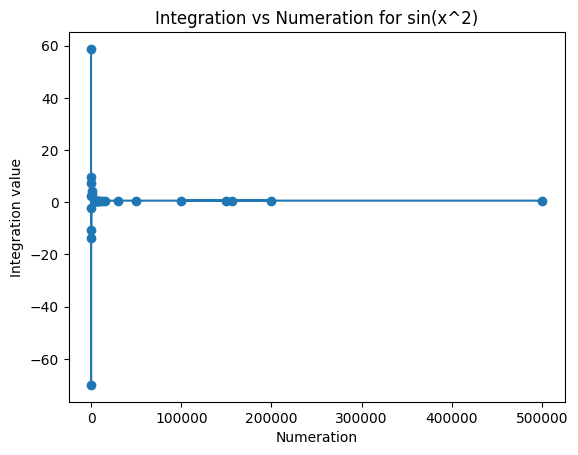

The value without significant change for three sigfigs is 16214 with relative error 0.0004999769212513114 .
The value without significant change for four sigfigs is 50187 with relative error 4.999990296489522e-05 .
The value without significant change for five sigfigs is 156645 with relative error 4.999950652547195e-06 .


In [8]:
import pandas as pd
import numpy as np
import pylab as py

Nlist = [2,4,8,16,32,64,128,256,512,1024, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 15000, 30000, 50000, 150000, 156645, 200000, 100000, 500000]

def midpoint(f,a,b,N):
    h = (b - a) / N
    
    my_sum = 0

    # Compute the sum somehow.  Maybe one of the loops above?
    for i in range(N):
        my_sum = my_sum + f((a + (i + 1/2)*h)**2) * h
    return my_sum


table_list = np.zeros((len(Nlist), 2))

for iN, N in enumerate(Nlist):
    table_list[iN] = [N, midpoint(np.sin, 0, 100, N)]

table = pd.DataFrame(table_list, columns=["N", "I"])
print(table)

y_list = np.zeros(len(table_list))

for i in range(len(table_list)):
    y_list[i] = table_list[i][1]

py.plot(Nlist, y_list, 'o-')
py.xlabel('Numeration')
py.ylabel('Integration value')
py.title("Integration vs Numeration for sin(x^2)")
py.show()

# ----- For three sigfigs -----

para = False
sigfig_value = 0.0005 # Change to find what degree you want your value to be correct
n = 15000
true_value = 0.631418 # Approximated with N = 500000

# Checks difference between values and if the difference is not met, it continues on. 
while para == False:
    n += 1
    curr_value = midpoint(np.sin, 0, 100, n)
    difference = abs(curr_value - true_value)
    relative_error = difference / true_value
    
    if relative_error < sigfig_value:
        print("The value without significant change for three sigfigs is", n, "with relative error", relative_error, ".")
        para = True

# ----- For four sigfigs -----
para = False
sigfig_value = 0.00005 # Change to find what degree you want your value to be correct
n = 50000
true_value = 0.631418 # Approximated with N = 500000

# Checks difference between values and if the difference is not met, it continues on. 
while para == False:
    n += 1
    curr_value = midpoint(np.sin, 0, 100, n)
    difference = abs(curr_value - true_value)
    relative_error = difference / true_value
    
    if relative_error < sigfig_value:
        print("The value without significant change for four sigfigs is", n, "with relative error", relative_error, ".")
        para = True

# ----- For five sigfigs -----
para = False
sigfig_value = 0.000005 # Change to find what degree you want your value to be correct
n = 156500
true_value = 0.631418 # Approximated with N = 500000

# Checks difference between values and if the difference is not met, it continues on. 
while para == False:
    n += 1
    curr_value = midpoint(np.sin, 0, 100, n)
    difference = abs(curr_value - true_value)
    relative_error = difference / true_value
    
    if relative_error < sigfig_value:
        print("The value without significant change for five sigfigs is", n, "with relative error", relative_error, ".")
        para = True